# Project 2 - Dimensionality Reduction

In this project, you will work with various imagery dataset. You will implement dimensionality reduction and manifold learning techniques for visualization and subsequent classification tasks to report on a set of questions.

The goal of this project includes:

1. Dataset visualization and interpretability via dimensionality reduction
2. Implement dimensionality reduction techniques with ``scikit-learn``
3. Carry out experiments to select best subspace projections
4. Design pipelines for hyperparameter tuning and model selection
5. Implement performance evaluation metrics and evaluate results
6. Report observations, propose business-centric solutions and propose mitigating strategies

## Deliverables

As part of this project, you should deliver the following materials:

1. [**4-page IEEE-format paper**](https://www.ieee.org/conferences/publishing/templates.html). Write a paper with no more than 4 pages addressing the **``tasks``** posed below. When writing this report, consider a business-oriented person as your reader (e.g. your PhD advisor, your internship manager, etc.). Tell *the story* for each datasets' goal and propose solutions by addressing (at least) the **``tasks posed below``**.

2. **Python Code**. Create two separate Notebooks: (1) "training.ipynb" used for training and hyperparameter tuning, (2) "test.ipynb" for evaluating the final trained model in the test set. The "test.ipynb" should load all trained objects and simply evaluate the performance. So don't forget to **push the trained models** to your repository to allow us to run it.

All of your code should run without any errors and be well-documented. 

3. **README.md file**. Edit the readme.md file in your repository and how to use your code. If there are user-defined parameters, your readme.md file must clearly indicate so and demonstrate how to use your code.

This is an **individual assignment**. 

These deliverables are **due Monday, March 31 @ 11:59pm**. Late submissions will not be accepted, so please plan accordingly.

---

# Step 1. Choose One of the Following Public Datasets


Pick one of these five datasets (all multi-class). Download and explore its structure/documentation as needed:

## CIFAR-10

[Description](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data): Contains 60,000 32×32 color images in 10 classes (e.g., airplane, car, bird, cat, deer, dog, frog, horse, ship, truck).

For downloading, refer to step 2 examples

## MNIST

[Description](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data): A dataset of 70,000 handwritten digits (0–9), each image is 28×28 grayscale.

For downloading, refer to step 2 examples

## Fashion-MNIST

[Description](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data): Contains 70,000 images of fashion items (10 classes: T-Shirt/Top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot), each 28×28 grayscale.

For downloading, refer to step 2 examples


You will use all classes in whichever dataset you pick, treating it as a multi-class classification problem.

---

# **Step 2. Data Preparation and Initial Visualization**  

- Download your dataset and split it into training (80%) and set (20%)
- Preprocessing steps may include:

    - Reshaping images into a 2D array if needed (e.g., for MNIST or Fashion-MNIST, each image is 28×28—reshape into a single 784-dimensional vector per sample if your model needs it).
    - Normalizing pixel values (e.g., scale them to [0, 1] or [-1, 1]).
    - Handling color images (like CIFAR-10, which are 32×32×3). You can flatten to a single 3,072-dimensional vector or keep the 2D+color structure if your library supports it.

- Below you can visualize some samples from each class

**``Task 1. Provide a summary of findings from the exploratory data analysis (bullet points or short analysis).``**

**``Task 2. Provide at least three visualizations showing trends or insights from the dataset.``**  

**``Task 3. Provide a written summary of the preprocessing steps.``**  




### CIFAR-10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# CIFAR-10 has 10 classes
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

def visualize_cifar10_samples(X, y, class_names, samples_per_class=5):
    """
    Displays a grid of sample images for each class in CIFAR-10.
    X: image array, shape (N, 32, 32, 3)
    y: labels array, shape (N, 1)
    class_names: list of 10 class names
    samples_per_class: how many examples to show per class
    """
    y = y.squeeze()  # Convert from shape (N,1) to (N,) if needed
    num_classes = len(class_names)
    plt.figure(figsize=(samples_per_class * 2, num_classes * 2))
    for cls_idx in range(num_classes):
        idxs = np.flatnonzero(y == cls_idx)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(num_classes, samples_per_class, cls_idx * samples_per_class + i + 1)
            plt.imshow(X[idx])
            plt.axis('off')
            if i == 0:
                plt.title(class_names[cls_idx])
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_cifar10_samples(X_train, y_train, class_names)


Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

### MNIST

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# MNIST has 10 classes (digits 0 through 9)
class_names = [str(i) for i in range(10)]

def visualize_mnist_samples(X, y, class_names, samples_per_class=5):
    """
    Displays a grid of sample MNIST images for each digit (0-9).
    X: image array, shape (N, 28, 28)
    y: labels array, shape (N,)
    class_names: list of digit strings
    samples_per_class: how many examples to show per digit
    """
    num_classes = len(class_names)
    plt.figure(figsize=(samples_per_class * 2, num_classes * 2))
    for cls_idx in range(num_classes):
        idxs = np.where(y == cls_idx)[0]
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(num_classes, samples_per_class, cls_idx * samples_per_class + i + 1)
            plt.imshow(X[idx], cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(class_names[cls_idx])
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_mnist_samples(X_train, y_train, class_names)


ModuleNotFoundError: No module named 'tensorflow'

### Fashion MNIST

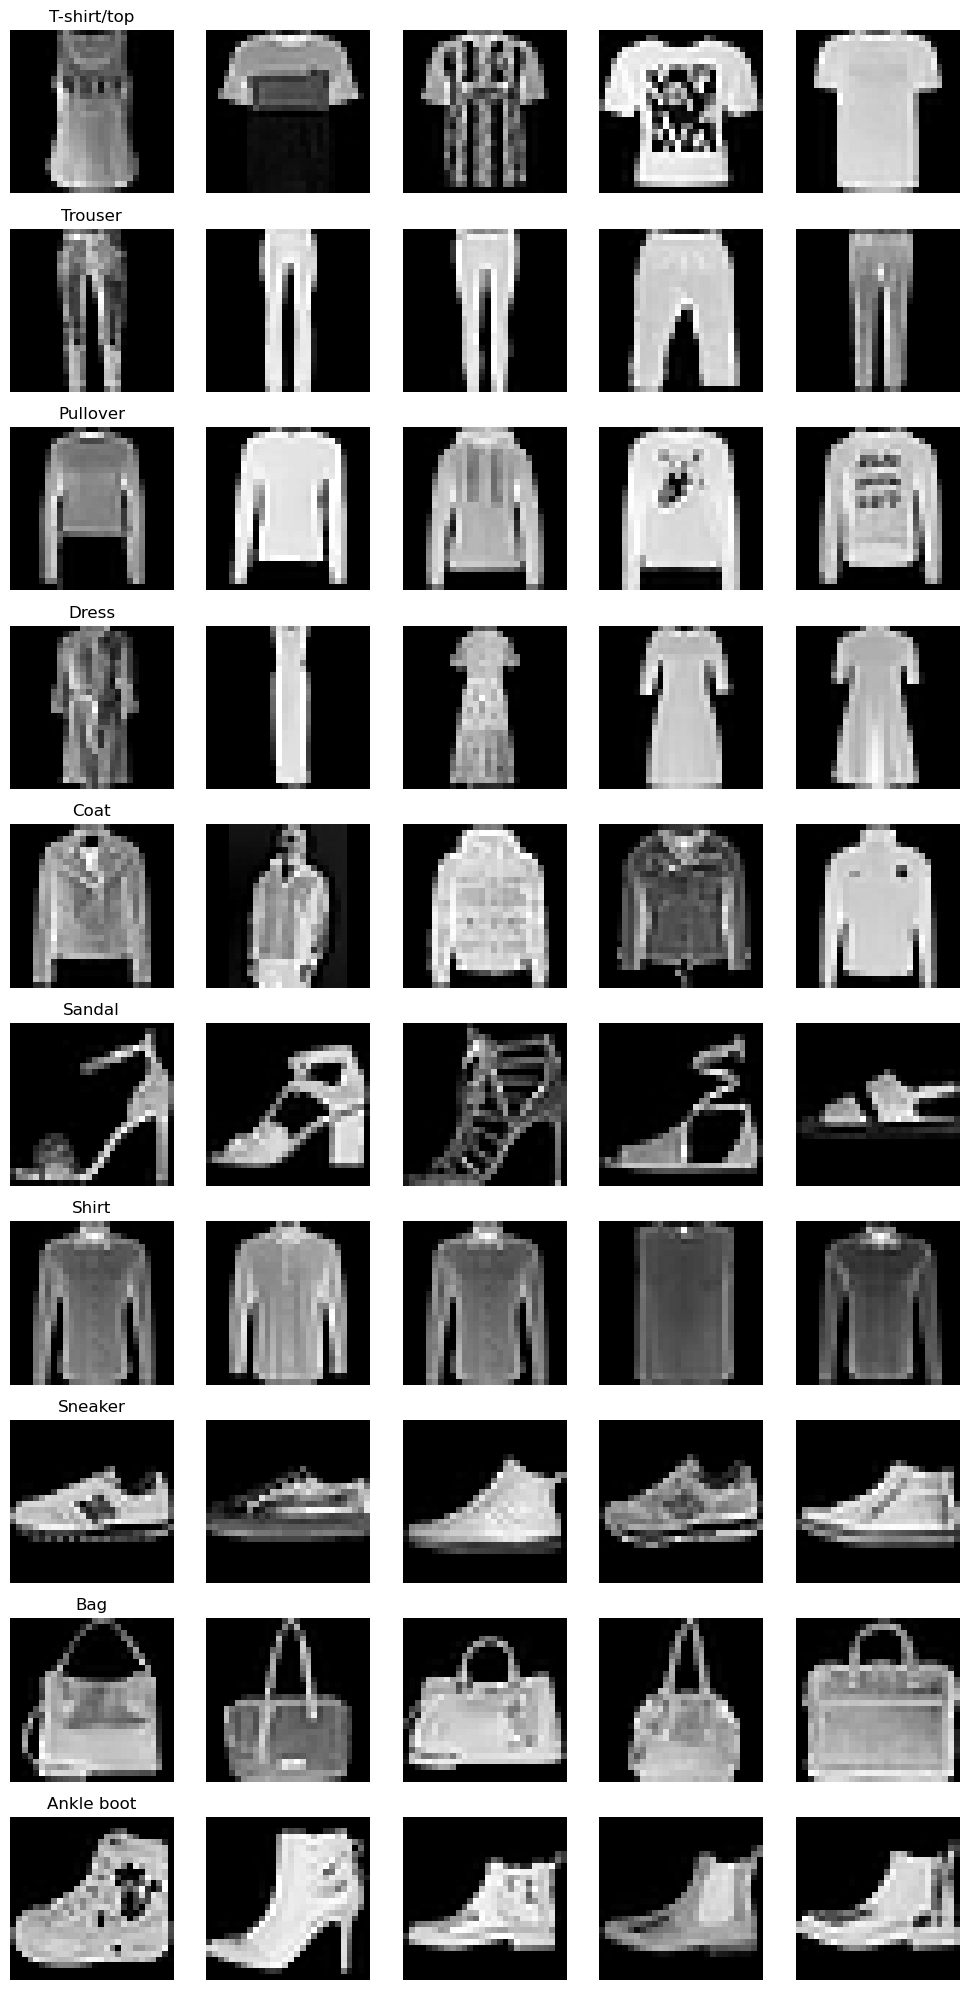

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Fashion-MNIST classes
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def visualize_fashion_mnist_samples(X, y, class_names, samples_per_class=5):
    """
    Displays a grid of sample Fashion-MNIST images for each of the 10 categories.
    X: image array, shape (N, 28, 28)
    y: labels array, shape (N,)
    class_names: list of category names
    samples_per_class: how many examples to show per category
    """
    num_classes = len(class_names)
    plt.figure(figsize=(samples_per_class * 2, num_classes * 2))
    for cls_idx in range(num_classes):
        idxs = np.where(y == cls_idx)[0]
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(num_classes, samples_per_class, cls_idx * samples_per_class + i + 1)
            plt.imshow(X[idx], cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(class_names[cls_idx])
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_fashion_mnist_samples(X_train, y_train, class_names)


## **Step 3: Initial Classification (No Dimensionality Reduction)**  


1. **Models to Explore:**

    - Support Vector Classifier (SVC)
    - Random Forest
    - Logistic Regression (multi-class)


2. **Hyperparameter Tuning:**

    - For SVC (multi-class in ``scikit-learn`` typically “one-vs-one” or “one-vs-rest” under the hood):
    
        - ``kernel``: [“rbf”, “linear”]
        - ``C``: e.g. [0.1, 1, 10]
        - ``gamma``: [“scale”, “auto”] (if using RBF)
        
    - For Random Forest:**
    
        - ``n_estimators``: e.g. [50, 100, 200]
        - ``max_depth``: [None, 5, 10]

    - For Logistic Regression:**
    
        - ``penalty``: [“l2”]
        - ``solver``: [“saga”, “lbfgs”]
        - ``C``: [0.01, 0.1, 1, 10]
        - ``max_iter``: e.g. [100, 200, 500]
        

3. **Model Training and Metrics:**

    - Record accuracy and F1-score (macro-F1 is often used for multi-class).
    - Training time: measure how long it takes to train each model.
    
**``Task 4. Clearly report best hyperparameter set per model and metrics``**

----


## **Step 4: PCA Dimensionality Reduction**  

 
1. Train a ``pipeline`` to perform dimensionality reduction with Principal Component Analysis (PCA). Answer the following questions:

    - How many components are needed to explain 90% of the variance?
    - Visualize examples of image reconstructions. What is the average RMSE of the reconstruction as a function of number of components preserved?
    
2. Train a ``pipeline`` for the same classifiers in part (1) with dimensionality reduction via PCA.

    - Carry the standard hyperparameter tuning (including ``n_components``).
    - Compare performance measures and training time.

3. Repeat question (3) for using manifold learning algorithms. Utilize the new lower-dimensional feature space to build a classifier.

    - Use the same classifiers.
    - Compare performance metrics and training/inference time with those for question (3) and (1).
    - Visualize and interpret what the first 2 dimensions in the manifold learning algorithms you train. Use the ``plot_components`` function presented in lecture.

4. What is the overall best ``pipeline``?
    - Report the confusion matrices.
    - Visualize misclassified samples. Do you see a pattern? Provide a discussion on how you would move forward to address the misclassifications.
    
**``Task 5. Clearly report insights about items 1-4 in this step``**

---

## **Step 5: Performance Evaluation**  

- Load Test Data

    - Load the original dataset
    - Apply the same preprocessing ``pipeline`` used in training.ipynb
    - Extract the 20% test set (the same as used during training)
    - Load Trained Models & Pipeline

- Load the preprocessing pipeline
- Load the saved classification models


**Evaluate Classification Model**

- Generate predictions on the test set. Compute:
    - Accuracy
    - Precision, Recall, F1-score
    - Confusion Matrix
    - ROC-AUC Curve


**``Task 6. After completing all steps above, provide the following:``**

- Compare model combinations and justify which one is better for each task.


---

## **Step 6: Report Findings & Business Insights**  

**``Task 7. Interpret the results.``**
- What trends did you observe?  
- How well do these models generalize?  
 - How can this analysis be useful to music streaming platforms?  


---

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

---